In [60]:
# File imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as yf

# Import settings
plt.style.use('ggplot')

In [61]:
# Download the market data
data = yf.download('^GSPC', period='max', interval='1d', auto_adjust=True)['Close']

# Calculate the returns
daily_returns = data['^GSPC'].pct_change().dropna()
monthly_returns = data['^GSPC'].resample('ME').last().pct_change().dropna() # Month end
yearly_returns = data['^GSPC'].resample('YE').last().pct_change().dropna()  # Year end

returns = {
    'Daily' : daily_returns,
    'Monthly' : monthly_returns,
    'Yearly' : yearly_returns
}

[*********************100%***********************]  1 of 1 completed


### Return Distributions
Given daily, monthly, and annual returns for the S&P 500 we focus on the distribution and summary statistics for each sampling period.

Daily Returns:
Positive Returns(%): 52.4142 | Negative Returns(%): 47.5858
count    24459.000000
mean         0.000310
std          0.011956
min         -0.204669
25%         -0.004550
50%          0.000494
75%          0.005475
max          0.166096
Name: ^GSPC, dtype: float64
Monthly Returns:
Positive Returns(%): 59.5381 | Negative Returns(%): 40.4619
count    1169.000000
mean        0.006426
std         0.053489
min        -0.299423
25%        -0.019144
50%         0.009364
75%         0.035968
max         0.391376
Name: ^GSPC, dtype: float64
Yearly Returns:
Positive Returns(%): 67.3469 | Negative Returns(%): 32.6531
count    98.000000
mean      0.079432
std       0.189524
min      -0.470665
25%      -0.050598
50%       0.110887
75%       0.227663
max       0.450222
Name: ^GSPC, dtype: float64


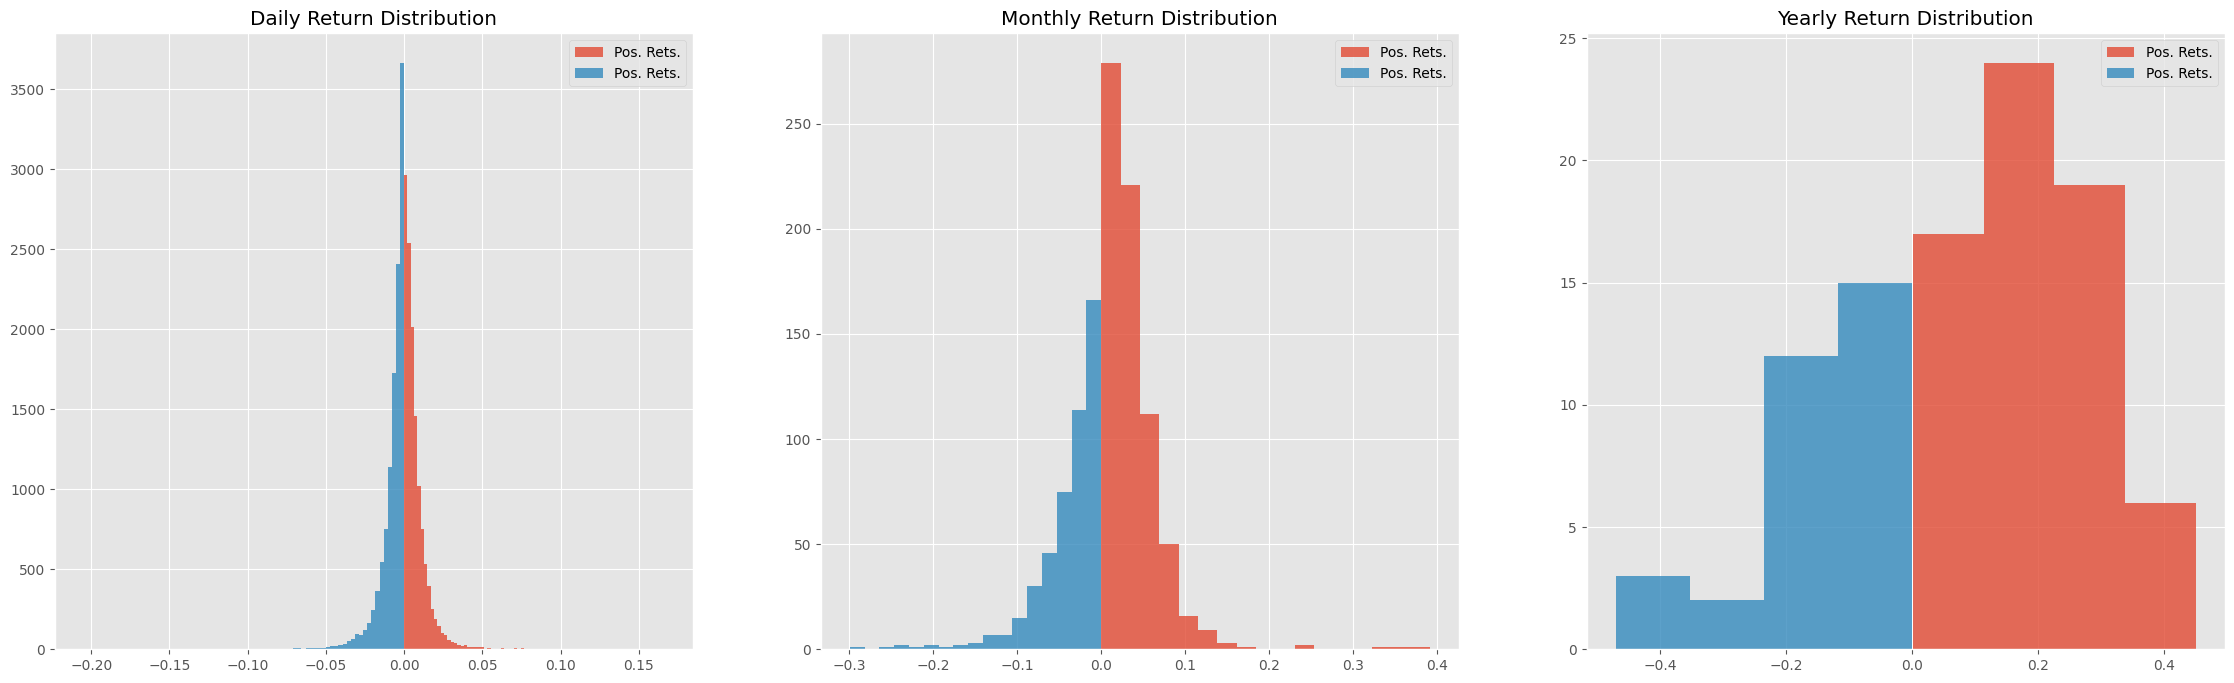

In [62]:
fig, axes = plt.subplots(1, 3, figsize=(28, 8))

# Determine the total % of positive and negative returns for earch periodicity
ncol = 0
for k, v in returns.items():
    pos_returns = v[v > 0]
    neg_returns = v[v <= 0]

    pos_pct = len(pos_returns) / len(v) * 100
    neg_pct = len(neg_returns) / len(v) * 100

    print(f'{k} Returns:')
    print(f'Positive Returns(%): {pos_pct:.4f} | Negative Returns(%): {neg_pct:.4f}')
    print(v.describe())

    bins = int(np.sqrt(len(v)) / 2)

    # Plot the distribution of returns
    axes[ncol].hist(pos_returns, bins=bins, alpha=0.8, label='Pos. Rets.')
    axes[ncol].hist(neg_returns, bins=bins, alpha=0.8, label='Pos. Rets.')
    axes[ncol].set_title(f'{k} Return Distribution')
    axes[ncol].legend()

    ncol += 1

# Display the plot
plt.show()

Observed above, all periods have a larger percentage of positive returns compared to negative returns (which makes intuitive sense). Given that the price of the S&P 500 has advanced since 1928, we would expect a larger number of positive returns. The more intersting observation is that as the time period increases, the number of positive returns also increases. Why? <Conclusion Here>